## Assignment 1: Confusion Matrix Metrics

1. Generate a confusion matrix as well as accuracy, precision, recall and f1 scores for the model below

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving income.csv to income.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

income = pd.read_csv("income.csv")
income.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [ ]:
def income_model_prep(data):
    from sklearn.model_selection import train_test_split
    data = pd.get_dummies(
        data.assign(
            target = np.where(data["SalStat"] == " less than or equal to 50,000", 0, 1),
            nativecountry = data["nativecountry"].replace({" Holand-Netherlands": " Germany"}),
            occupation = data["occupation"].replace({" Armed-Forces": " ?"}),
            JobType = data["JobType"].replace({" Never-worked": " Without-pay"}),
        ).drop("SalStat", axis=1),
        drop_first=True
    )
    X = data.drop("target", axis=1)
    y = data["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = income_model_prep(income)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000)

lr = logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logreg = LogisticRegression(max_iter= 5000)
lr = logreg.fit(X_train_std,y_train)

score_df = pd.DataFrame({"Test Accuracy": accuracy_score(y_test , lr.predict(X_test_std)),
                         "Test Precision": precision_score(y_test , lr.predict(X_test_std)),
                         "Test Recall": recall_score(y_test , lr.predict(X_test_std)),
                         "Test F1-Score": f1_score(y_test , lr.predict(X_test_std))
                         }, index = ['Scores'])
score_df.T

,Scores
Test Accuracy,0.856785
Test Precision,0.734167
Test Recall,0.619802
Test F1-Score,0.672155


In [ ]:
# from sklearn.model_selection import GridSearchCV

# parameters = {
#     "C" : np.linspace(0.1,2,20),
#     "penalty" : ["l1" , "l2" , "elasticnet"],
#     "l1_ratio" : np.linspace(0,1,11)
# }


# gridsearch = GridSearchCV(LogisticRegression(solver="saga", max_iter = 10) , parameters)
# gridsearch.fit(X_train_std , y_train)
# gridsearch.best_params_

## Assignment 2: Precision Recall Curve and AUC

1. Plot the precison and recall curves for your model. Plot F1 vs. the Threshold - where is F1 maximized?
2. Report accuracy, precision, recall, and F1 at the threshold determined above.
3. Plot an ROC curve for your model and calculate the AUC score.

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [ ]:
score_df = pd.DataFrame({
    "Test Accuracy": accuracy_score(y_test , lr.predict(X_test_std)),
    "Test Precision": precision_score(y_test,lr.predict(X_test_std)),
    "Test Recall":recall_score(y_test,lr.predict(X_test_std))},
     index = ["Scores"])

score_df.T

,Scores
Test Accuracy,0.856785
Test Precision,0.734167
Test Recall,0.619802


In [ ]:
r_curve.shape ,p_curve.shape, t_curve.shape

NameError: name 'r_curve' is not defined

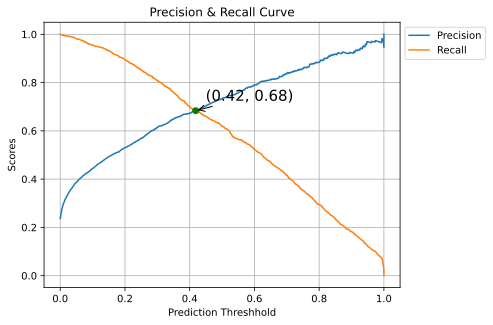

In [ ]:
from sklearn.metrics import precision_recall_curve

p_curve,r_curve,t_curve = precision_recall_curve(y_test , lr.predict_proba(X_test_std)[:,1])
plt.plot(t_curve, p_curve[:-1], label = 'Precision')
plt.plot(t_curve , r_curve[:-1], label = 'Recall')
idx = np.argmin(np.abs(p_curve - r_curve))
plt.plot(t_curve[idx], p_curve[idx], 'go')
# Annotate the value
plt.annotate(
    f"({t_curve[idx]:.2f}, {p_curve[idx]:.2f})",
    (t_curve[idx], p_curve[idx]),
    textcoords="offset points",
    xytext=(10,10),
    ha='left',
    color='black',
    fontsize=15,
    arrowprops=dict(arrowstyle="->", color='black')
)
plt.xlabel('Prediction Threshhold')
plt.ylabel('Scores')
plt.legend(bbox_to_anchor = (1,1))
plt.title('Precision & Recall Curve')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import f1_score

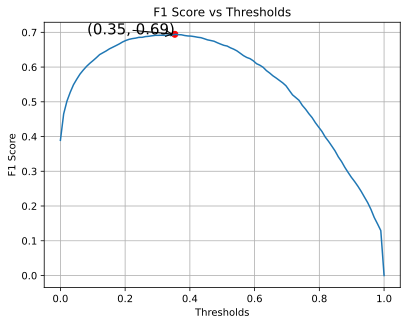

In [ ]:
y_pred = lr.predict_proba(X_train_std)[:,1]
thresholds = np.linspace(0,1,100)
f1_scores = [f1_score(y_train , (y_pred >= thresh)) for thresh in thresholds]
max_idx = np.argmax(f1_scores)
plt.plot(thresholds[max_idx], f1_scores[max_idx], 'ro')
plt.annotate(
    f"({thresholds[max_idx]:.2f}, {f1_scores[max_idx]:.2f})",
    (thresholds[max_idx] , f1_scores[max_idx]),
    ha = 'right',
    color = 'black',
    fontsize = 15,
    arrowprops = dict(arrowstyle="->", color='black')
)
plt.plot(thresholds, f1_scores)
plt.xlabel('Thresholds')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Thresholds')
plt.grid()
plt.show()

In [ ]:
preds = lr.predict_proba(X_test)[:,1]>thresholds[max_idx]

print(f"Accuracy: {accuracy_score(y_test,preds)}")
print(f"Precision:{precision_score(y_test , preds)}")
print(f"Recall:{recall_score(y_test,preds)}")
print(f"F1: {f1_score(y_test , preds)}")

Accuracy: 0.23686679174484052
Precision:0.23686679174484052
Recall:1.0
F1: 0.38301099734546834


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
y_probs = lr.predict_proba(X_test)[:,1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


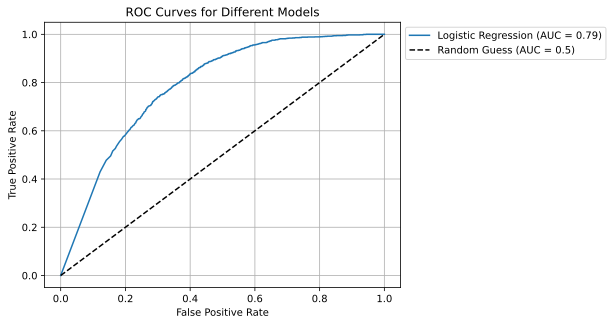

In [ ]:
fpr , tpr , threshold = roc_curve(y_test , y_probs)
auc_score = auc(fpr,tpr)

plt.plot(fpr,tpr , label = f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0,1],[0,1],'k--',label = 'Random Guess (AUC = 0.5)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(bbox_to_anchor = (1,1))
plt.grid()
plt.show()

## Assignment 3: MultiClass Metrics

1. Calculate precision & recall by class for the fitted model below on your test data
2. Calculate overall accuracy as well as weighted averages for precision & recall on your test data.

In [ ]:
upload = files.upload()

Saving credit_train_clean.csv to credit_train_clean.csv


In [ ]:
credit_df = pd.read_csv("credit_train_clean.csv").drop(["Name", "SSN"], axis=1)
credit_df.head()

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
from sklearn.model_selection import train_test_split

features = [
    "Age",
    "Month",
    "Annual_Income",
    "Num_Bank_Accounts",
    "Changed_Credit_Limit",
    "Num_Credit_Card",
    "Credit_History_Age",
    "Payment_of_Min_Amount",
    "Monthly_Balance",
    "Payment_Behaviour",
    "Num_Credit_Inquiries",
    "Outstanding_Debt",
    "Credit_Mix",
    "Total_EMI_per_month"
]

X = pd.get_dummies(credit_df[features], dtype="int", drop_first=True)
y = credit_df["Credit_Score"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

In [ ]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6218
0.62435


In [ ]:
lr.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

In [ ]:
lr.coef_

array([[ 1.25813502e-02,  3.97430632e-02,  3.37829144e-07,
        -1.36059889e-01,  9.27056366e-03, -1.64710877e-01,
         2.73142427e-03, -3.23851930e-05, -9.10649150e-02,
        -1.16598421e-04,  1.11989568e-03,  4.26326495e-02,
        -4.80971827e-02,  4.73502066e-03,  1.75376586e-03,
        -8.42876731e-04, -2.42394202e-03, -1.09707289e-02,
         8.69363246e-02, -8.34315505e-02],
       [-1.16033624e-02, -3.62956479e-02, -1.10363715e-06,
         4.74664121e-02, -4.53455363e-02,  1.30814565e-01,
        -3.16425247e-03, -7.82798561e-05,  1.18970394e-01,
         1.91655977e-04, -6.68988532e-04, -1.21328982e-02,
         7.89036004e-03, -6.41639764e-03, -3.51149916e-03,
        -1.60824293e-03,  2.55212851e-03,  1.11515695e-02,
         8.46375476e-03, -2.63189023e-02],
       [-9.77987820e-04, -3.44741534e-03,  7.65807946e-07,
         8.85934765e-02,  3.60749725e-02,  3.38963113e-02,
         4.32828190e-04,  1.10665049e-04, -2.79054795e-02,
        -7.50575567e-05, -4.5

In [ ]:
lr.intercept_

array([-0.00271048, -0.00372052,  0.006431  ])

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

In [ ]:
accuracy_score(y_test , y_pred)

0.62435

In [ ]:
precision_score(y_test , y_pred , average = None)

array([0.55356362, 0.65490473, 0.62672708])

In [ ]:
f1_score(y_test,y_pred, average = None)

array([0.42995415, 0.55491329, 0.70083482])

In [ ]:
precision_score(y_test , y_pred, average = None)

array([0.55356362, 0.65490473, 0.62672708])

In [ ]:
precision_score(y_test , y_pred , average= 'macro')

0.6117318108018531

In [ ]:
precision_score(y_test, y_pred , average = 'weighted')

0.6216979098766359